In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import warnings
warnings.filterwarnings('ignore')

The dataset contain the Tesal Stock Date from 2010-06-29  to 2020-02-03

Tesla has been on the rice recently, with crazy +100% spike in last 30 days alone . With the history , may be we can find out why??

Stock data includes Open, high , low , close, Adj close and volume

# Importing Dataset

In [2]:
df=pd.read_csv("Tesla.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...,...
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300


In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2411,2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2412,2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2413,2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2414,2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2415,2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


# Exploratory Data Analysis

In [5]:
df.shape

(2416, 7)

In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Here the detail of the columns 

In [7]:
print("The dimensions of the dataset: ",df.shape)
print("The column headers :",df.columns)

The dimensions of the dataset:  (2416, 7)
The column headers : Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


Here we clear see that in this dataset contain 2416 rows and 7 columns . Out of which 1 is target variable and remaining 6 are independent variables

In [8]:
# Here we check the date 
print("Min. Date :", df.Date.min())
print("Max.Date: ",df["Date"].max())

Min. Date : 2010-06-29
Max.Date:  2020-02-03


In [9]:
# checking the types of columns
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Here we can clear see that the date type is not correct then we convert the date type

In [10]:
# Converting date type object to date 
df['Date'] = pd.to_datetime(df['Date'],format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2416 non-null   datetime64[ns]
 1   Open       2416 non-null   float64       
 2   High       2416 non-null   float64       
 3   Low        2416 non-null   float64       
 4   Close      2416 non-null   float64       
 5   Adj Close  2416 non-null   float64       
 6   Volume     2416 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 132.3 KB


Here we clear see that the date type succefully change

In [11]:
df.set_index('Date',inplace = True)

In [12]:
# Checking the null values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [13]:
df.isnull().sum().sum()

0

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


As we clear see there is no null values present in this dataset

In [15]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
...,...,...,...,...,...,...
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700


Here we see that date is not type of  column

In [16]:
df.nunique().to_frame(" No. of unique values")

,No. of unique values
Open,2132
High,2128
Low,2136
Close,2225
Adj Close,2225
Volume,2391


In [17]:
# Count values of each columns
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

30.000000     6
28.000000     6
28.500000     5
220.000000    5
360.000000    4
             ..
210.050003    1
205.809998    1
226.009995    1
230.300003    1
673.690002    1
Name: Open, Length: 2132, dtype: int64


34.500000     7
28.000000     7
30.000000     7
27.000000     6
34.799999     5
             ..
225.490005    1
206.789993    1
209.880005    1
205.000000    1
786.140015    1
Name: High, Length: 2128, dtype: int64


27.299999     6
28.000000     6
203.000000    5
27.900000     4
28.250000     4
             ..
232.429993    1
236.059998    1
244.410004    1
249.449997    1
673.520020    1
Name: Low, Length: 2136, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.979996    1
237.789993    1
780.000000    1
Name: Close, Length: 2225, dtype: int64


27.420000     4
20.719999     3
27.120001     3
26.500000     3
219.580002    3
             ..
235.839996    1
240.039993    1
233.

Since we clear see that two column has same value since we will drop the one of column

In [18]:
df.drop(["Adj Close"],axis=1,inplace = True)

In [19]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


# Checking Duplicate values in DataFrame

In [20]:
print("Total Duplicates Rows are ",df.duplicated().sum())

Total Duplicates Rows are  0


# Description of dataset

In [21]:
# statistical summary of numerical columns 
df.describe()

,Open,High,Low,Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,4.706500e+07


This gives the statiscal information of the numerical columns . The summary of the dataset loooks perfect  since there is no negative values presents

From the above description we can observe there is no missing values in any columns.

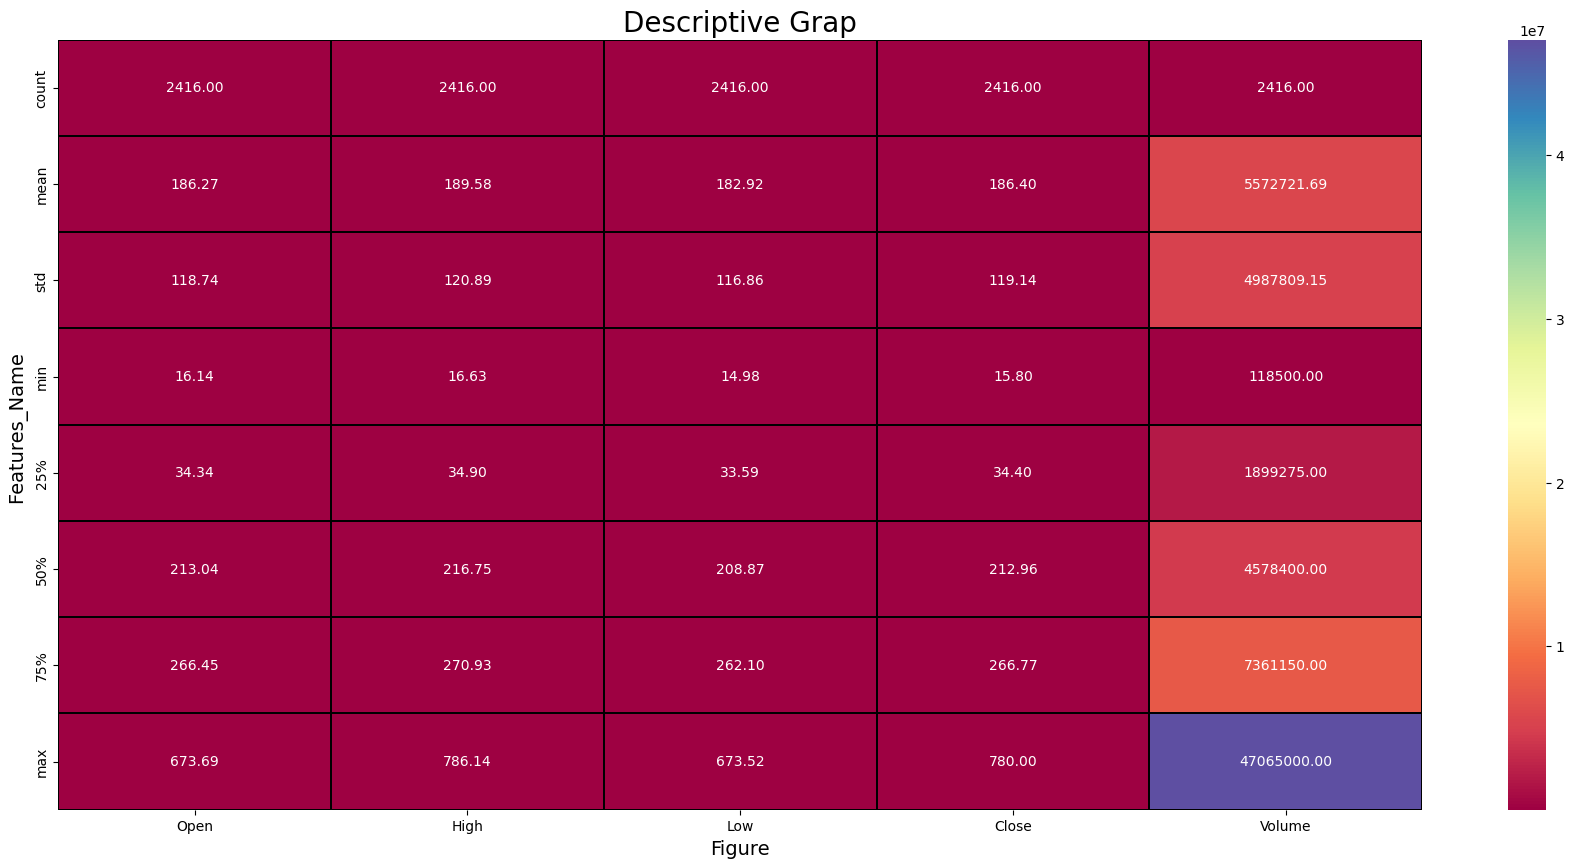

In [22]:
plt.figure(figsize = (22,10))
sns.heatmap(df.describe(),annot = True ,fmt = '0.2f',linewidth = .2,linecolor = 'black', cmap = "Spectral")
plt.xlabel('Figure',fontsize = 14)
plt.ylabel('Features_Name ',fontsize = 14)
plt.title("Descriptive Grap" , fontsize=20)
plt.show()

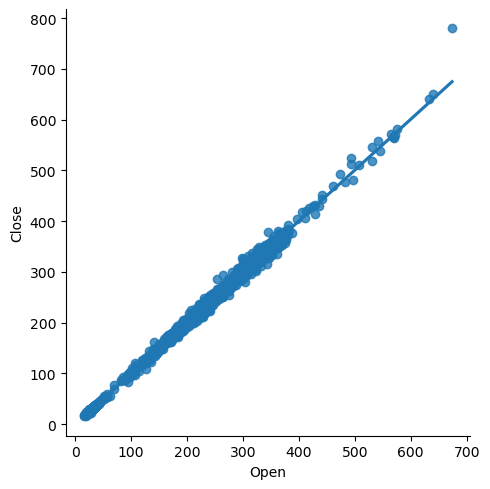

In [23]:
sns.lmplot(x='Open',y='Close',data =df,palette='colorblind')

Open has positive correlation with close

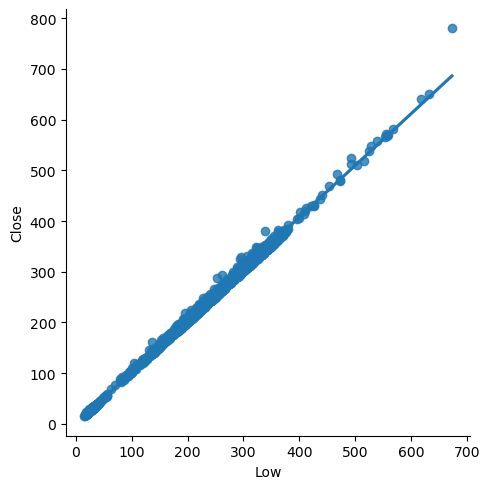

In [74]:
sns.lmplot(x='Low',y='Close',data =df,palette='colorblind')

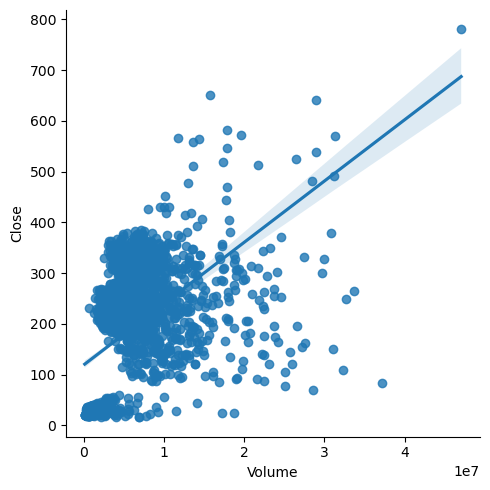

In [75]:
sns.lmplot(x='Volume',y='Close',data =df,palette='colorblind')

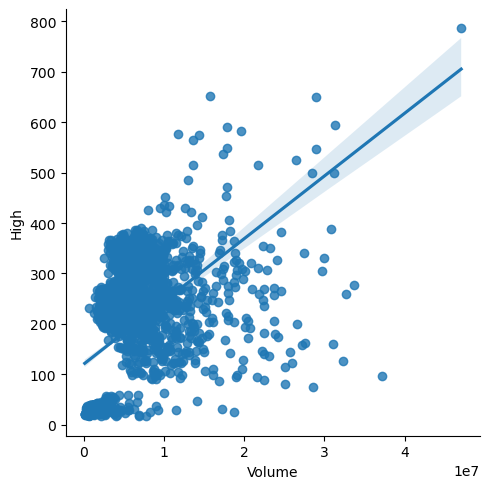

In [76]:
sns.lmplot(x='Volume',y='High',data =df,palette='colorblind')

Volume have positive correlation with High

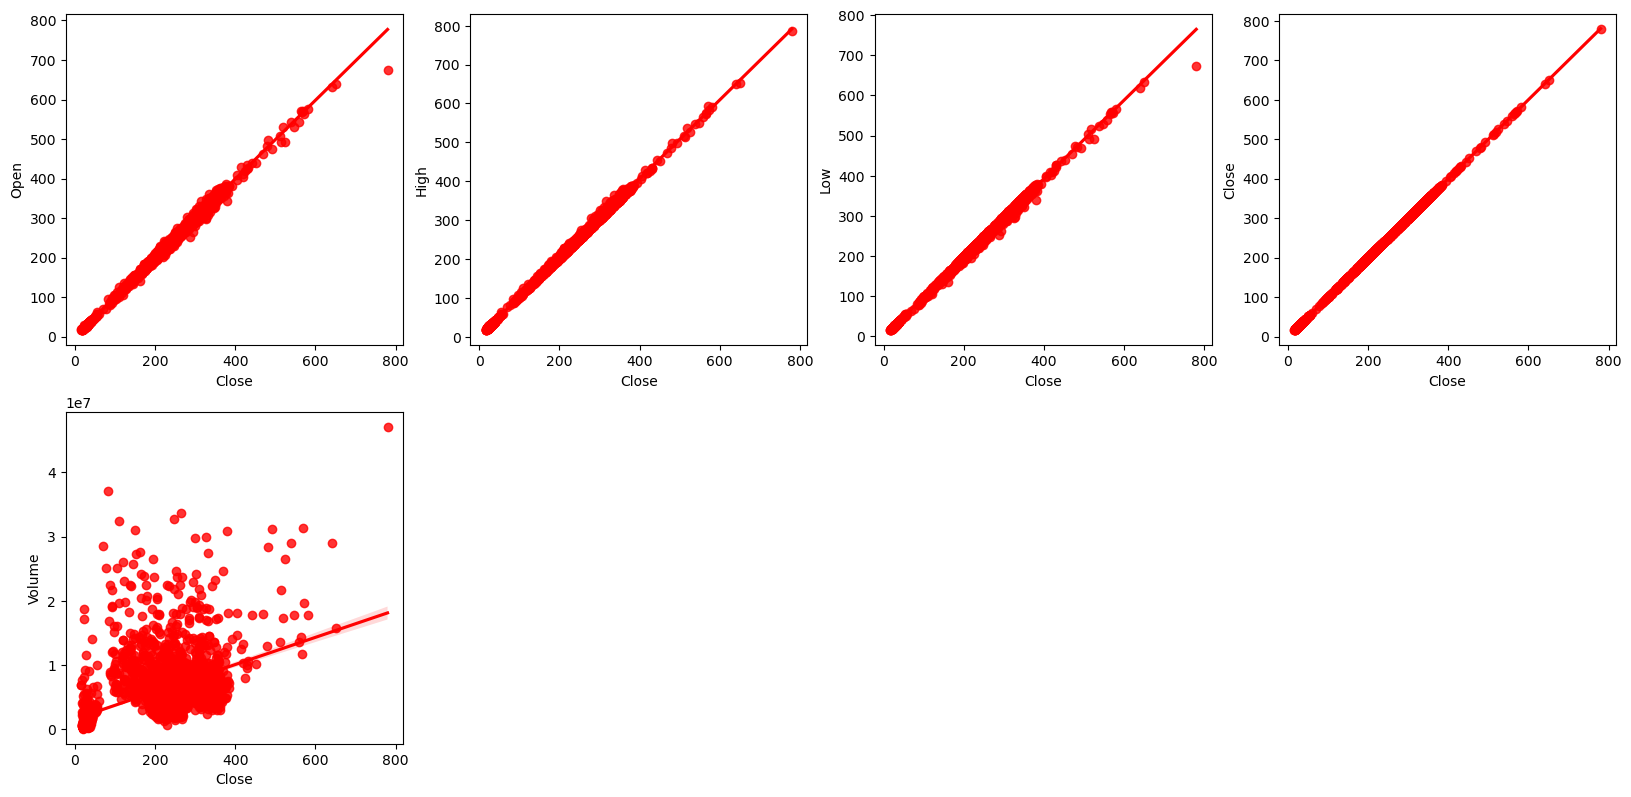

In [77]:
plt.figure(figsize = (20,25))
p = 1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.regplot(x="Close",y=i , data = df,color = 'r')
        plt.xlabel("Close")
        plt.ylabel(i)
    p+=1
plt.show()

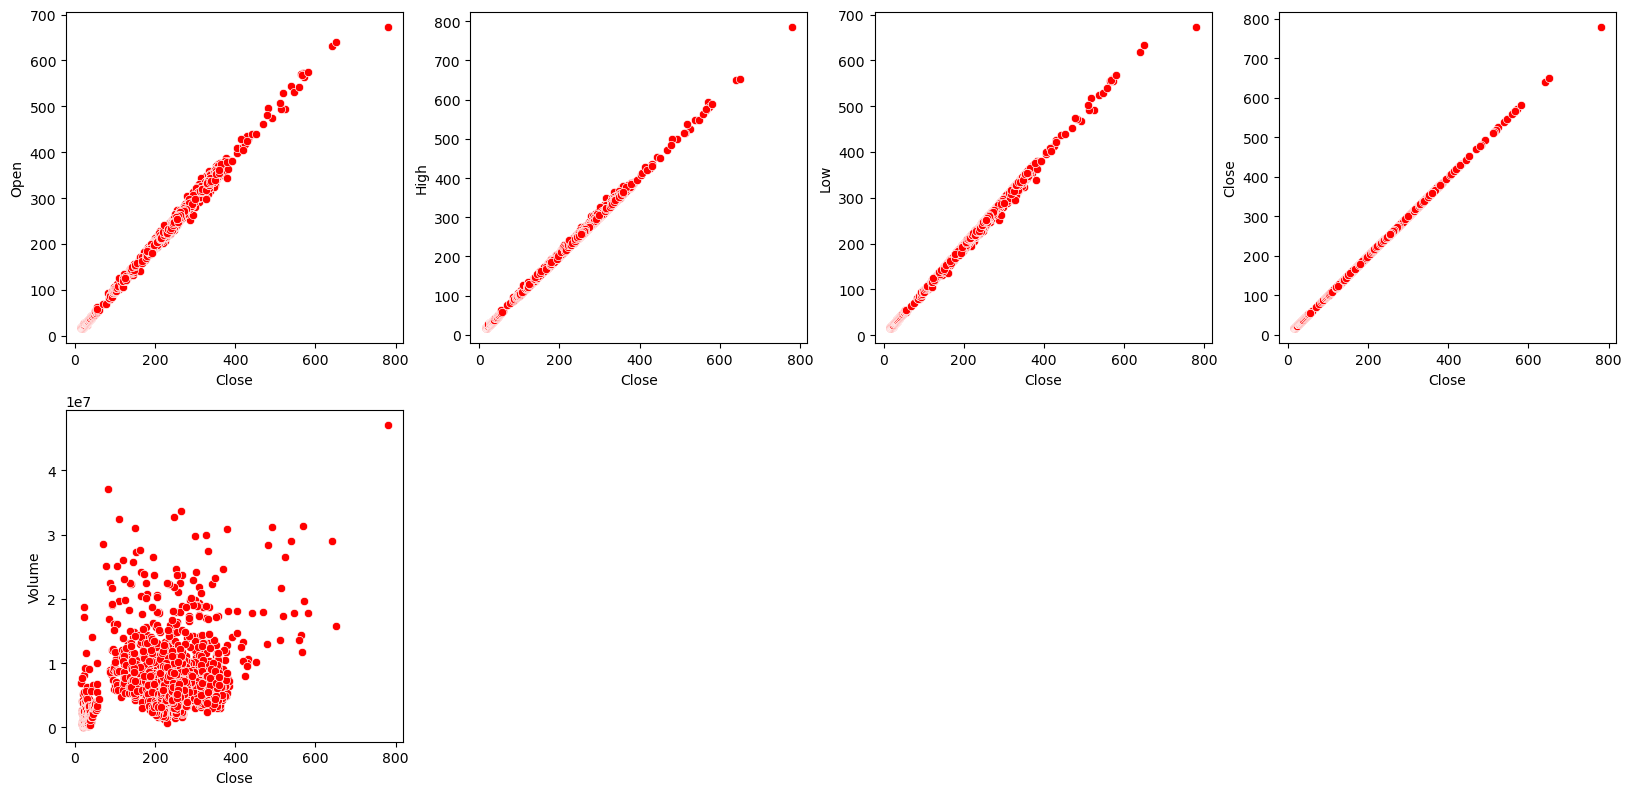

In [78]:
plt.figure(figsize = (20,25))
p = 1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x="Close",y=i , data = df,color = 'r')
        plt.xlabel("Close")
        plt.ylabel(i)
    p+=1
plt.show()

The pairplot gives the pairwise relation between the features . On the diagonal we can notice the distribution plots.
The feature Low,High and Open have strong linear relation with each other.

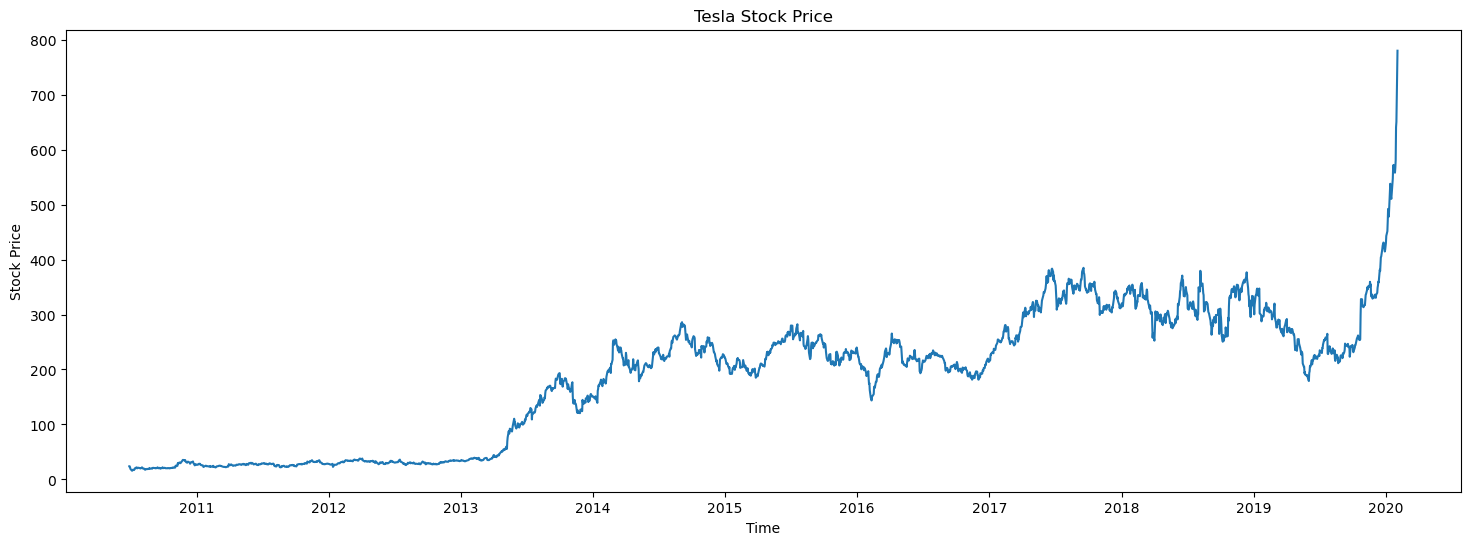

In [79]:
plt.figure(figsize = (18,6))
plt.plot(df.Close,label = 'closing price')
plt.ylabel("Stock Price")
plt.xlabel("Time")
plt.title("Tesla Stock Price")
plt.show()

Text(0.5, 1.0, 'The General Trend of all values')

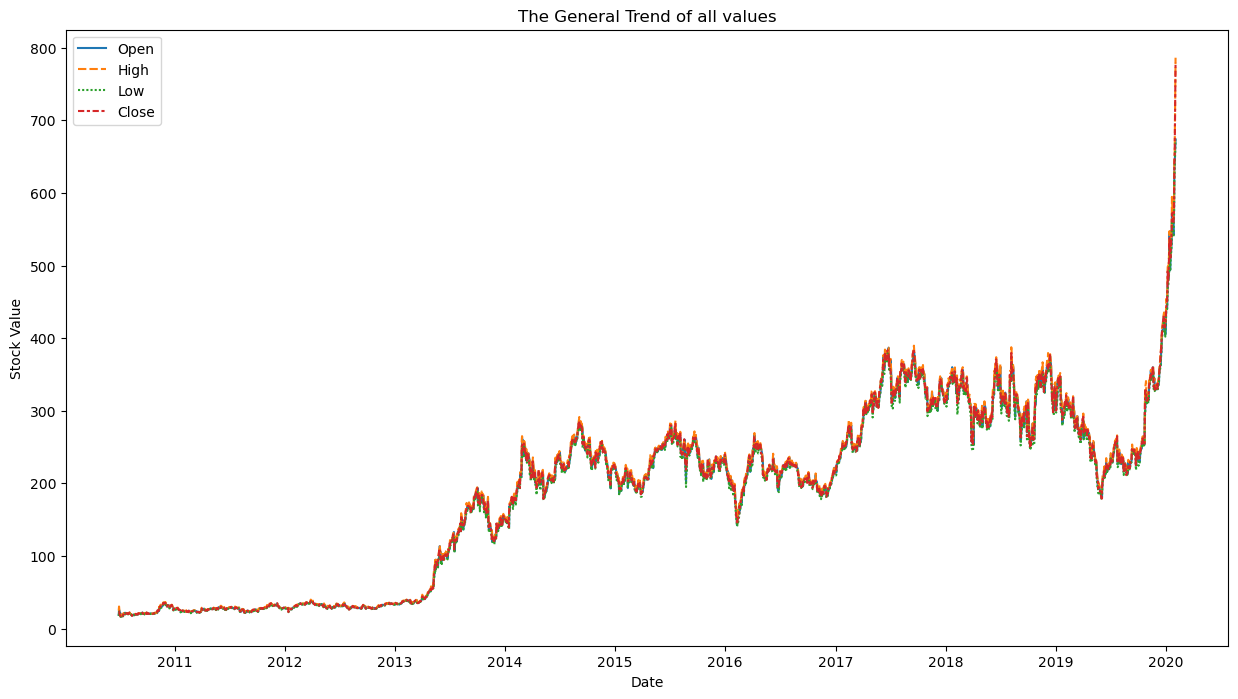

In [80]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df.iloc[:,:-1])
plt.ylabel("Stock Value")
plt.title("The General Trend of all values")

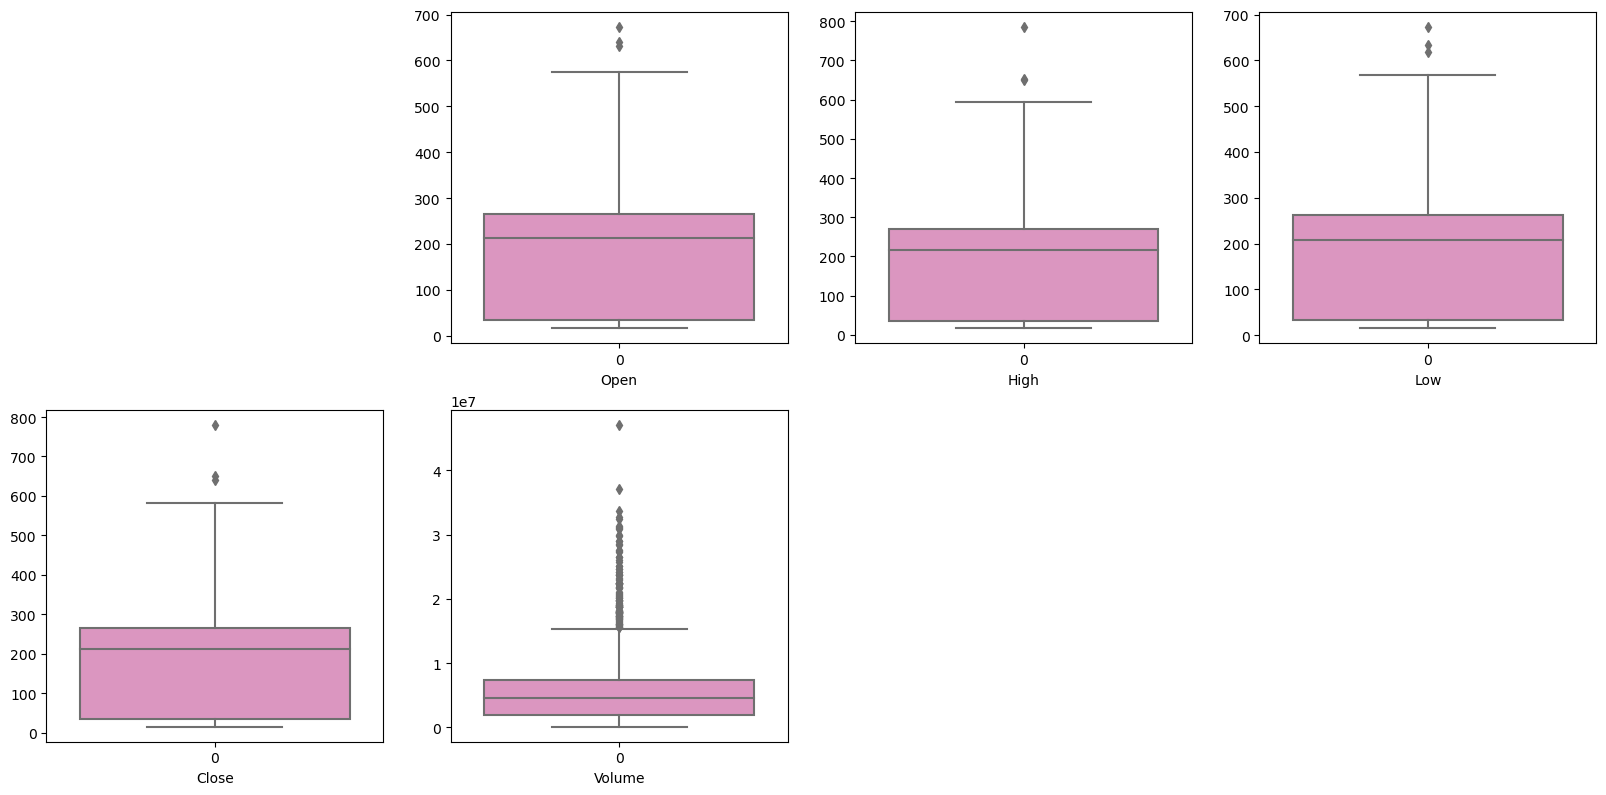

In [24]:
plt.figure(figsize=(20,25))
p = 2
for i in df:
    if p<=13:
        plt.subplot(5,4,p)
        sns.boxplot(df[i],palette = "Set2_r")
        plt.xlabel(i)
    p+=1
plt.show()

So we have found outliers in all columns

So , removing the outliers using zscore and IQR techniquesbefore building the model

In [25]:
from scipy.stats import zscore
out_features = df[["Open", "High","Low","Volume"]]
z=np.abs(zscore(out_features))
z

,Open,High,Low,Volume
Date,,,,
2010-06-29,1.409007,1.361644,1.415491,2.645713
2010-06-30,1.351812,1.316801,1.366190,2.329035
2010-07-01,1.358466,1.354032,1.392124,0.530619
2010-07-02,1.375313,1.377364,1.405477,0.086814
2010-07-06,1.400584,1.403012,1.430127,0.259522
...,...,...,...,...
2020-01-28,3.219618,3.203776,3.211097,1.246452
2020-01-29,3.280267,3.311249,3.291125,2.452241
2020-01-30,3.758132,3.816597,3.723964,4.699023


# Threshold

In [26]:
# threshold = 3
np.where(z>3)

(array([ 720,  721,  722,  723,  725,  733,  766,  767,  783,  795,  821,
         822,  845,  846,  847,  848,  854,  864,  892,  920,  921, 1506,
        1950, 2002, 2038, 2041, 2042, 2063, 2078, 2079, 2097, 2098, 2154,
        2182, 2206, 2220, 2221, 2226, 2240, 2283, 2347, 2348, 2398, 2399,
        2401, 2402, 2402, 2404, 2407, 2407, 2407, 2407, 2408, 2408, 2408,
        2409, 2409, 2409, 2410, 2410, 2411, 2411, 2411, 2412, 2412, 2412,
        2413, 2413, 2413, 2413, 2414, 2414, 2414, 2415, 2415, 2415, 2415],
       dtype=int64),
 array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
        3, 0, 3, 3, 0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2,
        0, 1, 2, 3, 0, 1, 2, 0, 1, 2, 3], dtype=int64))

In [27]:
z.iloc[723,3]

6.3349894289721185

In [28]:
# Now Removing the data above zscore and creating  shape
df1=df[(z<3).all(axis=1)]
df1.shape

(2360, 5)

In [29]:
# Shape of OLD and New DataFrame
print("Old DataFrame- ",df.shape[0])
print("New Data Frame- ",df1.shape[0])

Old DataFrame-  2416
New Data Frame-  2360


In [30]:
print("Data Loss Percentage- ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  2.3178807947019866


In [31]:
df1

,Open,High,Low,Close,Volume
Date,,,,,
2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300
2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100
2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800
2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800
2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...
2020-01-07,461.399994,471.630005,453.359985,469.059998,17882100
2020-01-10,481.790009,484.940002,473.700012,478.149994,12959500
2020-01-15,529.760010,537.840027,516.789978,518.500000,17368800


# Checking how the data has been distributed in each columns

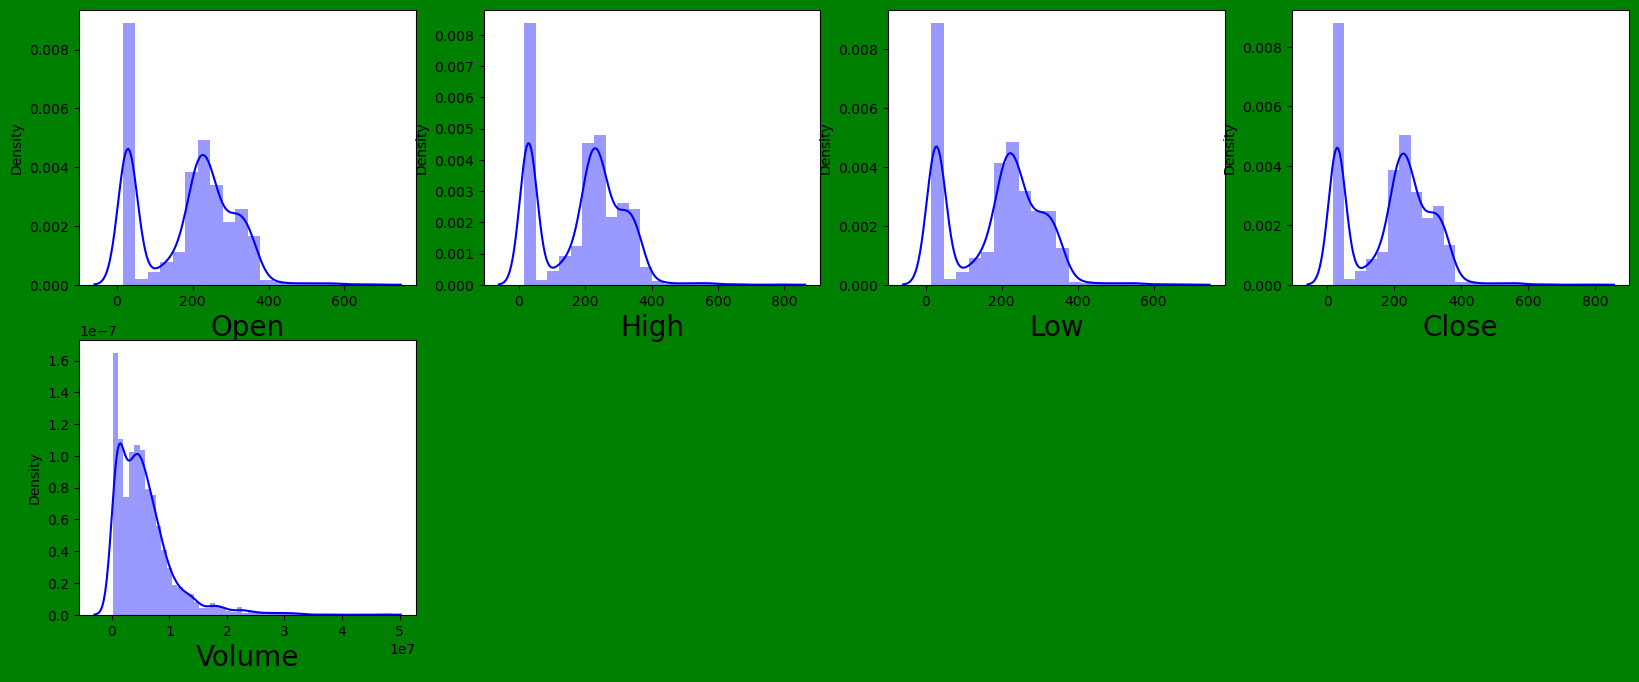

In [32]:
plt.figure(figsize=(20,25), facecolor = 'green')
plotnumber =1
for column in df:
    if plotnumber <= 18:
        ax =plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color = 'b')
        plt.xlabel(column,fontsize = 20)
    plotnumber += 1
plt.show()

# Checking Skewness

In [90]:
df.skew()

Open     -0.014380
High      0.011923
Low      -0.010357
Close     0.016514
Volume    2.165242
dtype: float64

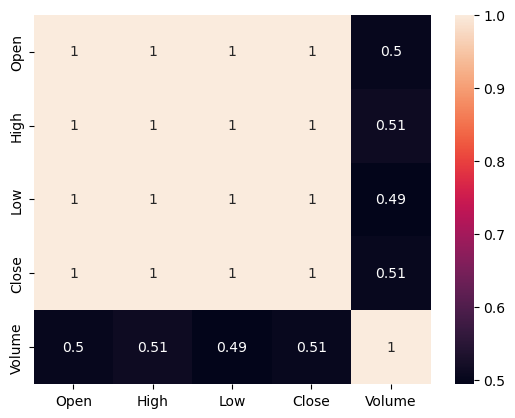

In [33]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [91]:
# Removing Skewnees using cuberoot method
df['Volume'] = np.cbrt(df['Volume'])

We have removed the skewness

In [92]:
df.skew()

Open     -0.014380
High      0.011923
Low      -0.010357
Close     0.016514
Volume    0.233977
dtype: float64

we can see the skewness has been reduced

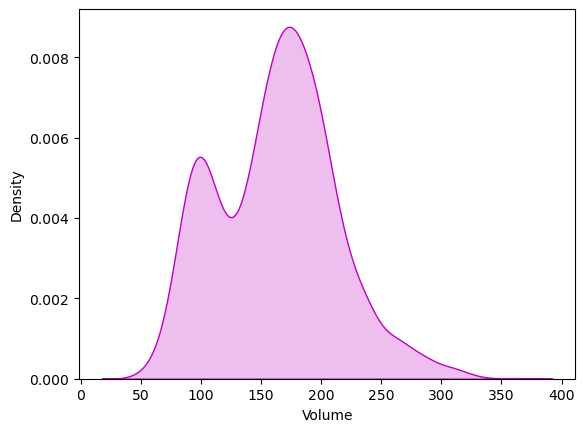

In [94]:
# Lets visualize the data after removing skewness
sns.distplot(df['Volume'],color ='m',kde_kws={"shade":True},hist=False)
plt.show()

# Correlation between the target variable and independent variables

In [95]:
# Now we will check the correlation between features using corr()
df.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999425,0.999575,0.998886,0.666228
High,0.999425,1.000000,0.999389,0.999640,0.673443
Low,0.999575,0.999389,1.000000,0.999447,0.659228
Close,0.998886,0.999640,0.999447,1.000000,0.666938
Volume,0.666228,0.673443,0.659228,0.666938,1.000000


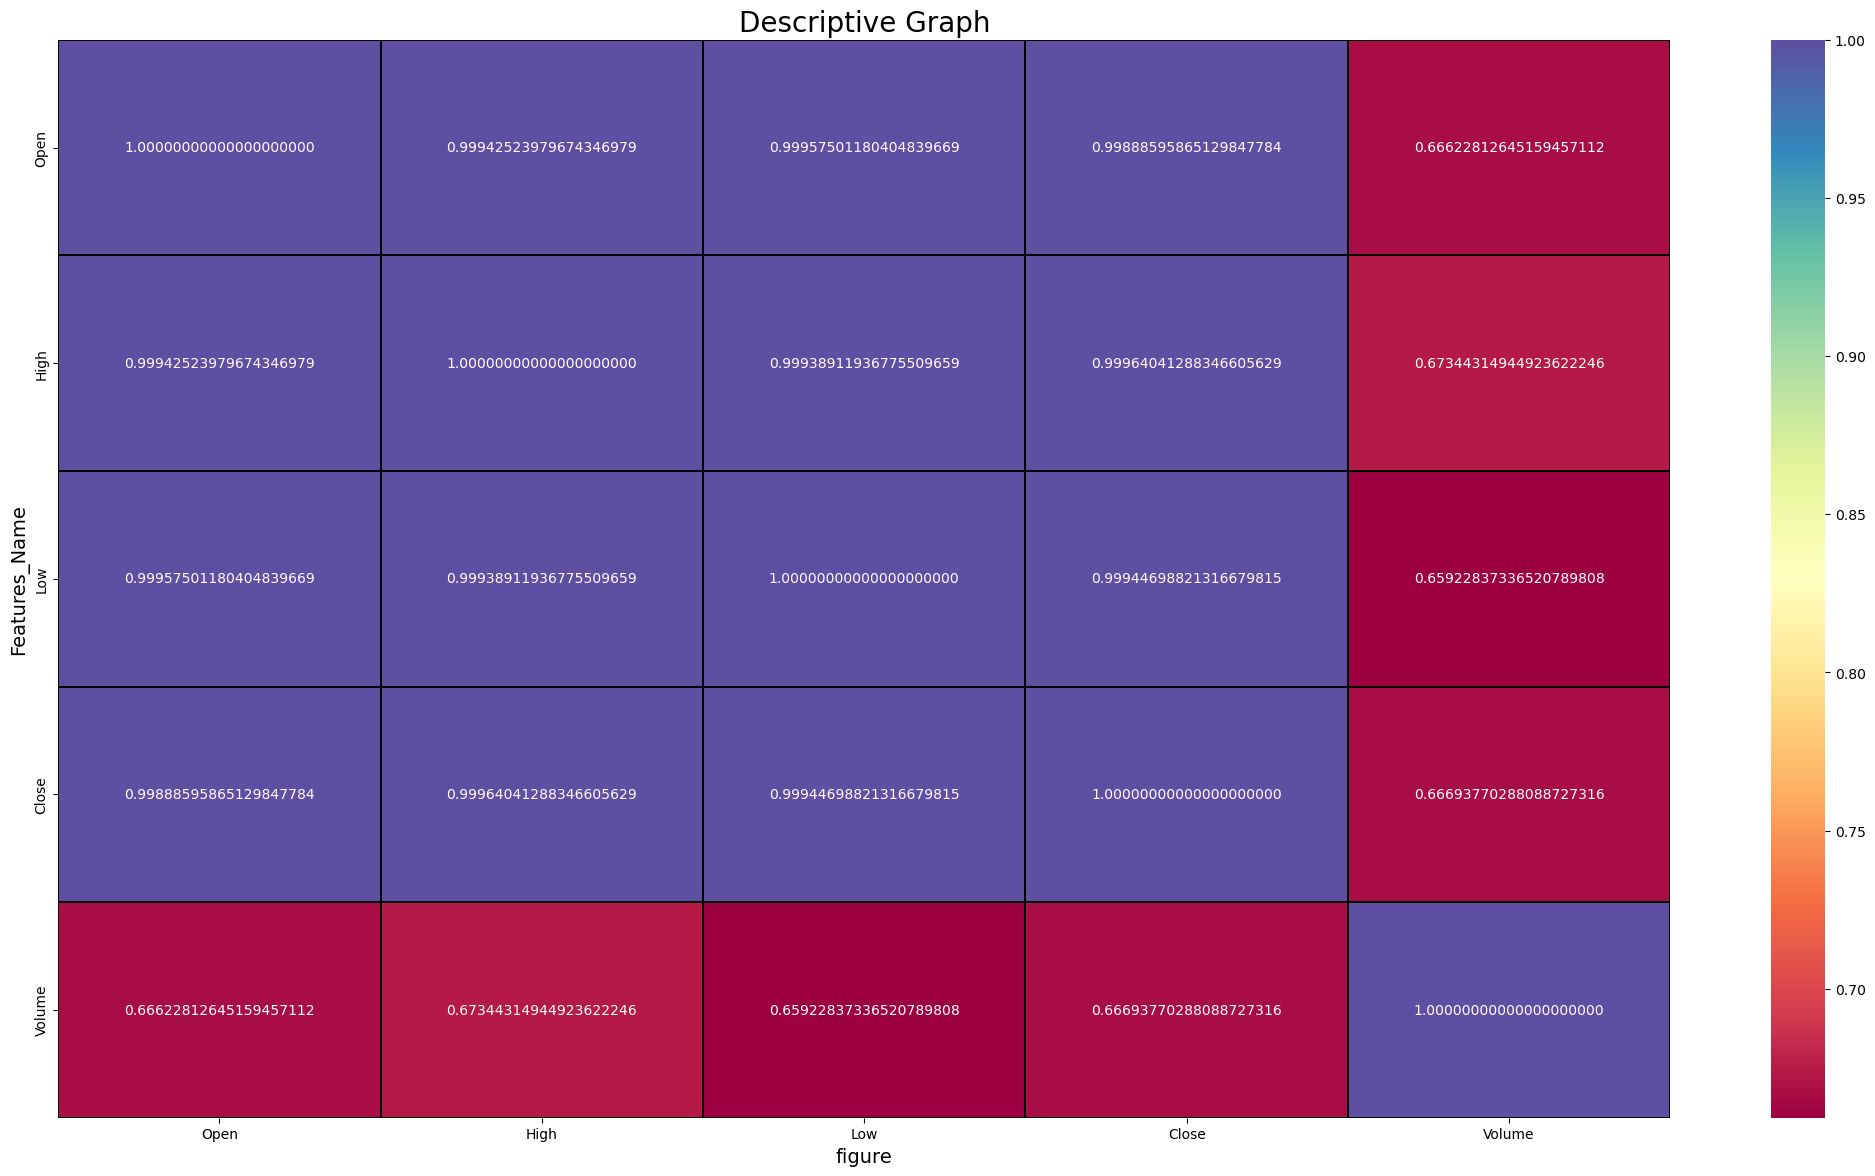

In [96]:
plt.figure(figsize=(26,14))
sns.heatmap(df.corr(),annot=True,fmt = '0.20f',linewidth = 0.2,linecolor='black',cmap = "Spectral")
plt.xlabel('figure',fontsize = 14)
plt.ylabel('Features_Name',fontsize = 14)
plt.title("Descriptive Graph",fontsize = 20)
plt.show()

In [97]:
df.corr().Close.sort_values()

Volume    0.666938
Open      0.998886
Low       0.999447
High      0.999640
Close     1.000000
Name: Close, dtype: float64

# Separating Feature and Label

In [98]:
# Separating the independent and target varaible into x and y
x = df1.drop("Close", axis = 1)
y = df1["Close"]
print("Feature Dimensions= ",x.shape)
print("Label Dimensions",y.shape)

Feature Dimensions=  (2360, 4)
Label Dimensions (2360,)


# Feature Scaling using standard Scalirization

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,Open,High,Low,Volume
0,-1.420294,-1.374432,-1.427526,3.473534
1,-1.361700,-1.328357,-1.377020,3.071844
2,-1.368517,-1.366611,-1.403588,0.790639
3,-1.385776,-1.390584,-1.417267,0.007455
4,-1.411664,-1.416937,-1.442520,0.446766
...,...,...,...,...
2355,2.397372,2.422375,2.393889,3.248626
2356,2.573326,2.535524,2.572237,1.996498
2357,2.987281,2.985228,2.950064,3.118062
2358,2.796138,2.796760,2.830552,2.166820


# Checking Variance Inflation Factor (VIF)

In [100]:
# Finding variance inflation factor in each scaled column
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns
vif

,VIF values,Features
0,1781.536724,Open
1,2425.594552,High
2,2154.245056,Low
3,2.262964,Volume


# Finding the best random state

In [101]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression


# Creating train test split

In [102]:
# Finding the best random state
maxAccu = 0
maxRS = 0
for i in range(1, 200):
    # Splitting the data into train and test sets using current random state (i)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    
    # Initializing and training the LinearRegression
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Maximum r2 score is ",maxAccu,"on Random_State",maxRS)

Maximum r2 score is  0.9997654701029349 on Random_State 139


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

# Linear Regression

In [ ]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR = LR.predict(x_test)
pred_train= LR.predict(x_train)
print(LR)
print("R2_Score: ",r2_score(y_test,pred_LR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_LR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_LR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_LR)))

In [ ]:
#Plotting
plt.figure(figsize = (10,6))
plt.scatter(x= pred_LR,y=y_test,color="r")
plt.plot(pred_LR,pred_LR,color = "b")
plt.xlabel("Actual",fontsize = 14)
plt.ylabel("Predicted",fontsize= 14)
plt.title("Linear Regression ",fontsize = 18 )
plt.show()

# Random Forest Regressor

In [55]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR = RFR.predict(x_test)
pred_train= RFR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_RFR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_RFR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_RFR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_Score:  0.9992281800343172
R2_Score on training Data:  99.99267508970591
Mean Absolute error:- 1.9411913040677904
Mean Squared error:- 9.951421642913147
Root Mean Squared Error:- 3.1545873966199043


# K Neighbors Regressor

In [56]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train= knn.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_knn))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_knn))
print("Mean Squared error:-",mean_squared_error(y_test,pred_knn))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_Score:  0.9975405574510369
R2_Score on training Data:  99.87805485813406
Mean Absolute error:- 3.068921038700565
Mean Squared error:- 31.71069795998713
Root Mean Squared Error:- 5.631225262763613


# Gradient Boosting Regressor

In [57]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR = GBR.predict(x_test)
pred_train= GBR.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_GBR))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_GBR))
print("Mean Squared error:-",mean_squared_error(y_test,pred_GBR))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_Score:  0.9991666954151939
R2_Score on training Data:  99.97580793580678
Mean Absolute error:- 2.1312460159149156
Mean Squared error:- 10.74417046602604
Root Mean Squared Error:- 3.277830145999948


# Lasso

In [58]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso = lasso.predict(x_test)
pred_train = lasso.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_lasso))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_lasso))
print("Mean Squared error:-",mean_squared_error(y_test,pred_lasso))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_Score:  0.9991059059407721
R2_Score on training Data:  99.92091123130743
Mean Absolute error:- 2.4986273302258755
Mean Squared error:- 11.527956476132847
Root Mean Squared Error:- 3.3952844470136587


# Ridge

In [59]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_ridge = rd.predict(x_test)
pred_train = rd.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_ridge))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_ridge))
print("Mean Squared error:-",mean_squared_error(y_test,pred_ridge))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_Score:  0.9994446182141348
R2_Score on training Data:  99.953787353649
Mean Absolute error:- 1.7852818352133417
Mean Squared error:- 7.160786931767813
Root Mean Squared Error:- 2.675964673116559


# Decision Tree Regressor

In [60]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr = dtr.predict(x_test)
pred_train = dtr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_dtr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_dtr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_dtr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_dtr)))


R2_Score:  0.9987611182302379
R2_Score on training Data:  100.0
Mean Absolute error:- 2.5091950663841804
Mean Squared error:- 15.973459362008606
Root Mean Squared Error:- 3.996681043316893


# Support Vector Regressor

In [61]:
svr = SVR()
svr.fit(x_train,y_train)
pred_svr = svr.predict(x_test)
pred_train = svr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_svr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_svr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_svr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_svr)))

R2_Score:  0.9630016161180066
R2_Score on training Data:  96.17291156707245
Mean Absolute error:- 8.613082794953904
Mean Squared error:- 477.03678900088823
Root Mean Squared Error:- 21.841171877921024


In [62]:
svr.get_params

<bound method BaseEstimator.get_params of SVR()>

# Extra Trees Regressor

In [63]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)

print("R2_Score: ",r2_score(y_test,pred_etr))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred_etr))
print("Mean Squared error:-",mean_squared_error(y_test,pred_etr))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred_etr)))

R2_Score:  0.9993727389403083
R2_Score on training Data:  100.0
Mean Absolute error:- 1.8138344220480203
Mean Squared error:- 8.08755870891539
Root Mean Squared Error:- 2.8438633421659683


# Checking Cross validation score of each algorithm

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
score=cross_val_score(LR,x,y,cv=5,scoring = 'r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_LR)-score.mean())*100)

[0.99305198 0.99966177 0.99368894 0.99880914 0.99686762]
0.9964158896834654
Difference between R2 score and cross validation score is- 0.32555402865642735


In [66]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_RFR)-score1.mean())*100)

[0.59800051 0.97015137 0.98921318 0.9974985  0.91904572]
0.8947818539983625
Difference between R2 score and cross validation score is- 10.444632603595473


In [67]:
score2=cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_knn)-score2.mean())*100)

[-0.91340099  0.95066832  0.96616977  0.99217931  0.87527327]
0.5741779372753127
Difference between R2 score and cross validation score is- 42.33626201757241


In [68]:
score3=cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_GBR)-score3.mean())*100)

[0.42441929 0.97257067 0.9882749  0.99698744 0.91707414]
0.8598652879880866
Difference between R2 score and cross validation score is- 13.930140742710728


In [69]:
score4=cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_lasso)-score4.mean())*100)

[0.73431494 0.99896578 0.98437577 0.99559537 0.9898096 ]
0.9406122909950183
Difference between R2 score and cross validation score is- 5.849361494575378


In [70]:
score4=cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_ridge)-score4.mean())*100)

[0.99079602 0.99950149 0.99173907 0.9977193  0.994201  ]
0.994791376580834
Difference between R2 score and cross validation score is- 0.465324163330072


In [71]:
score5 = cross_val_score(svr,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_svr)-score5.mean())*100)

[-18.37027854   0.89079262   0.97778358   0.86609211  -0.04576617]
-3.1362752802691776
Difference between R2 score and cross validation score is- 409.92768963871845


In [72]:
score6 =cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is-",(r2_score(y_test,pred_etr)-score6.mean())*100)

[0.62458321 0.99879243 0.99145246 0.99775949 0.91937092]
0.9063917015776918
Difference between R2 score and cross validation score is- 9.298103736261654


From difference between R2 score and cross validation score computed on R2 socre we canconclude that Ridge Regression as our best fiiting and best performing model

# Hyper Parameter Tuning

In [73]:
from sklearn.model_selection import GridSearchCV

# Define the parameter 
parameters = {'alpha':[1.0,.05,.42],'fit_intercept':[True,False],
              'solver':['auto','svd','cholesky','lsqr','saga','lbfgs'],
              'positive':[False,True],
              'random_state':[1,4,10,20]
             }

In [74]:
GCV = GridSearchCV(Ridge(),parameters,cv = 5)

In [75]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.42],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga',
                                    'lbfgs']})

In [76]:
GCV.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'positive': False,
 'random_state': 1,
 'solver': 'auto'}

In [77]:
Model = Ridge(alpha = 0.05,fit_intercept = True,positive = False,random_state = 1, solver= 'auto')

In [78]:
Model.fit(x_train,y_train)
pred = Model.predict(x_test)
print("R2_Score: ",r2_score(y_test,pred))
print("R2_Score on training Data: ",r2_score(y_train,pred_train)*100)
print("Mean Absolute error:-",mean_absolute_error(y_test,pred))
print("Mean Squared error:-",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:-",np.sqrt(mean_squared_error(y_test,pred)))


R2_Score:  0.9996664009692663
R2_Score on training Data:  100.0
Mean Absolute error:- 1.4301307326866803
Mean Squared error:- 4.301242209459627
Root Mean Squared Error:- 2.0739436370016486


# Saving the model using joblib

In [79]:
# Saving the model
import joblib
joblib.dump(Model,"Teslastock.pkl")

['Teslastock.pkl']

In [80]:
import pickle
filename = "Teslastock.pkl"
pickle.dump(Model, open(filename,'wb'))  #Saved model

# Predicting the saved model

In [81]:
load_model = pickle.load(open("Teslastock.pkl",'rb'))
result = load_model.score(x_test,y_test)
print(result*100)

99.96664009692662


# Conclusion

In [82]:
conclusion = pd.DataFrame([load_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,698,699,700,701,702,703,704,705,706,707
Predicted,228.864748,270.171724,229.208579,245.021994,205.256607,27.289148,304.517175,249.537939,350.511317,224.191335,...,29.140217,342.005509,26.580543,261.335290,24.368054,404.791944,268.962434,188.539935,32.072595,375.550770
Original,231.610001,272.230011,230.259995,247.100006,206.789993,27.559999,301.149994,251.080002,353.179993,221.669998,...,28.730000,345.000000,26.830000,267.529999,24.340000,405.589996,267.769989,190.339996,31.959999,373.910004


# Thank You  